In [ ]:
%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/data
%ls # then you should see the data file

/content/drive/My Drive/data
data_biodiversity.csv  diabetes.csv   ROC.png
data.tif               occupancy.txt  training.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
data_csv=pd.read_csv('training.csv') 
data_csv_copy=data_csv.copy()
X=data_csv.drop(["class","classlabel"],axis=1)
y=data_csv["class"]

In [ ]:
from sklearn.externals import joblib
import skimage.io as io
img_ds = io.imread("data.tif")
img = np.array(img_ds, dtype='uint16')
img.shape

 

# predict the class
#class_pred = yourmodel.predict (img_as_array)
#print('number of samples: ', len(data['data']))
#print('keys: ', list(data.keys()))
#print('description: ', data['description'])
#print('image shape: ', data['data'][0].shape)
#print('labels:', np.unique(data['label']))


(544, 544, 63)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


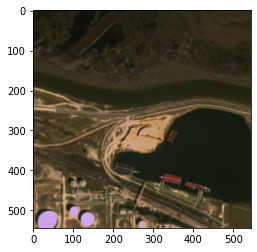

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img[:,:, [24,15,7]]/np.iinfo(img.dtype).max*20)

In [ ]:
new_shape = (img.shape[0] * img.shape[1], img.shape[2]) 
new_shape

(295936, 63)

In [ ]:
img_as_array = img[:, :, :].reshape(new_shape)
print(img_as_array)
print('Reshaped from {o} to {n}'.format(o=img.shape,
                                        n=img_as_array.shape))

[[65367 65469    58 ...  1228  1275  1416]
 [65308 65464    63 ...  1249  1336  1333]
 [65351 65470    67 ...  1402  1489  1561]
 ...
 [65414    19   139 ...  2886  2980  3092]
 [65421     2   125 ...  2947  2980  3040]
 [65426     8   123 ...  2863  3011  3086]]
Reshaped from (544, 544, 63) to (295936, 63)


In [ ]:
df = pd.DataFrame(data=img_as_array)
df.shape

(295936, 63)

In [ ]:
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score

X_norm=preprocessing.scale(X) 
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=10)
img_as_array = preprocessing.scale(img_as_array) 

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

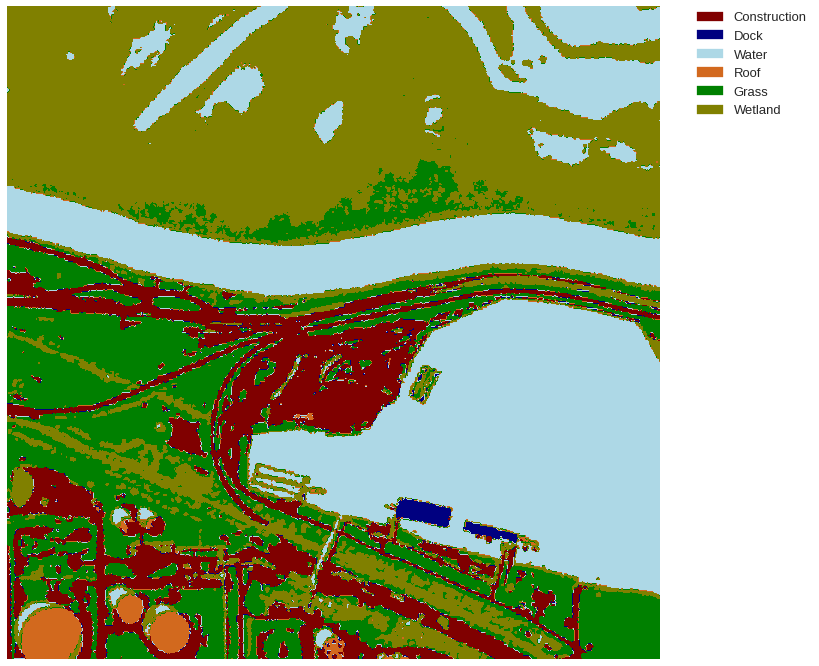

In [ ]:
def plot_class(model):
    X_norm=preprocessing.scale(X) 
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)
    model.fit(X_train, y_train)
    class_pred = model.predict(img_as_array)
    print(np.unique(class_pred))
    class_labels = ['Construction','Dock','Water','Roof','Grass','Wetland']
    classfication = class_pred.reshape(img[:, :, 0].shape)
    # Create a colormap from a list of colors
    colors = ['maroon','navy', 'lightblue', 'chocolate', 'green','olive']
    cmap = ListedColormap(colors)
    plt.figure(figsize=(12,12))
    f, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(classfication,
                  cmap=cmap)
    ep.draw_legend(im, titles=class_labels)
    ax.set_axis_off()
    plt.show()
    return 
model = LogisticRegression(max_iter=500)
plot_class(model)


[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

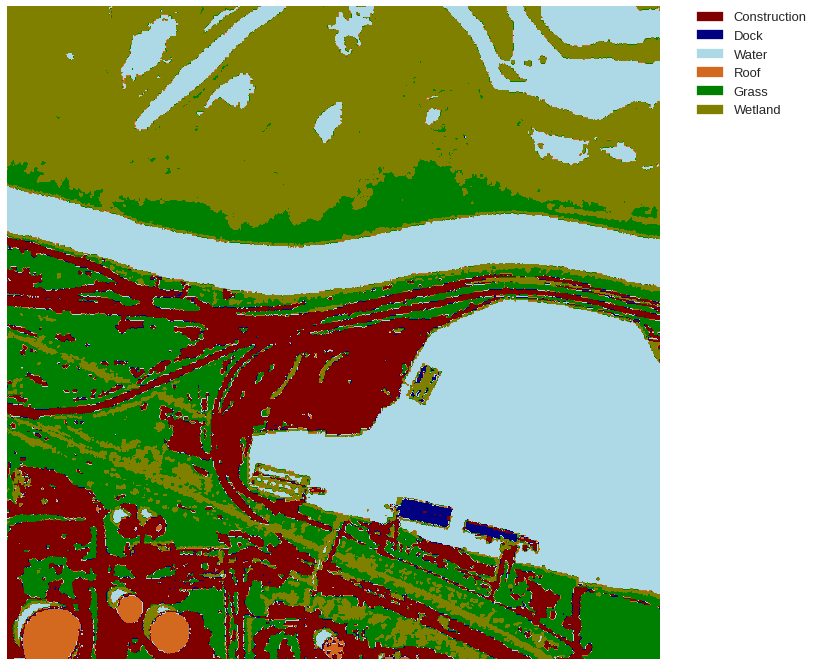

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
plot_class(model)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

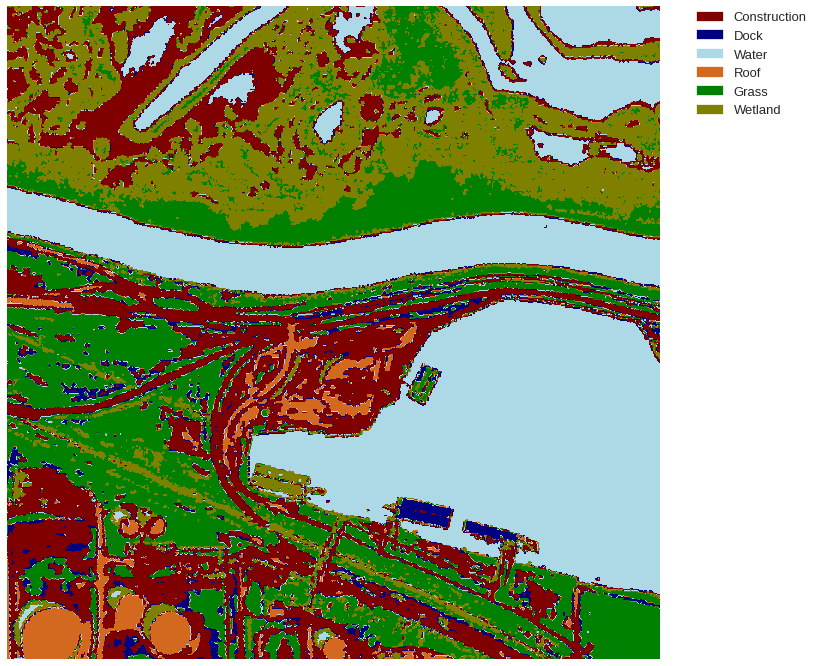

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
plot_class(model)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

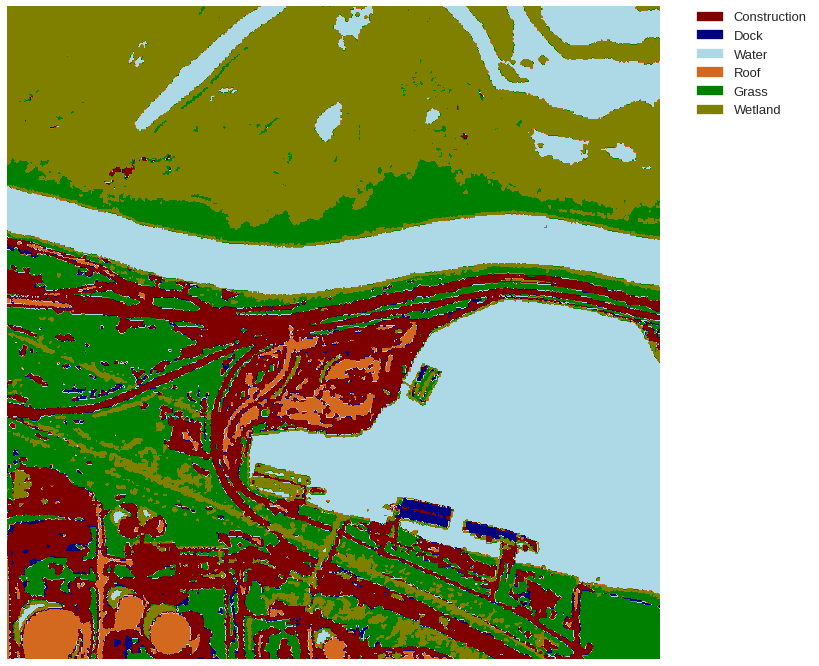

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier (n_estimators=100, n_jobs=-1, 
                                      max_features='auto', 
                                      max_depth= 18, min_samples_leaf=3,
                                      random_state=42)
plot_class(model)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

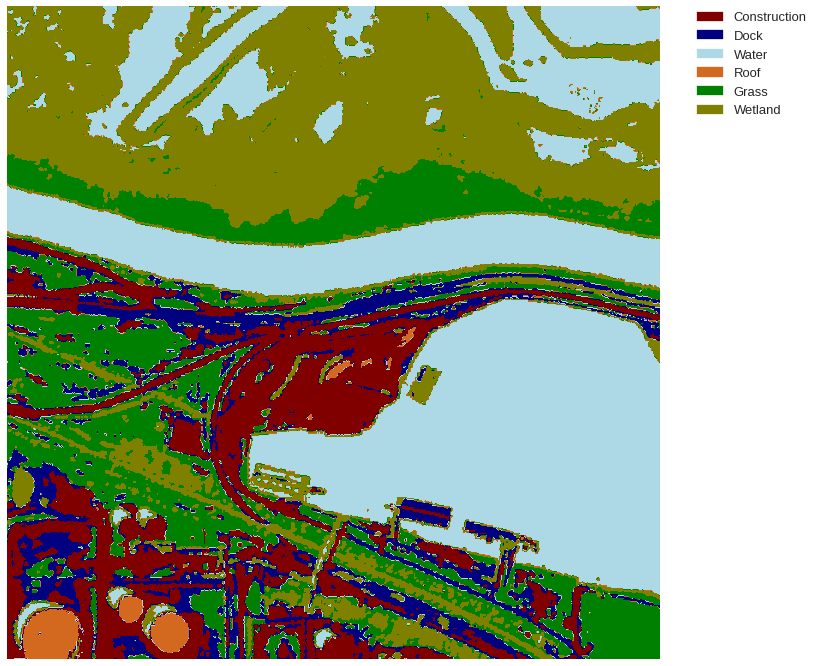

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB(var_smoothing=1e-02)
plot_class(model)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

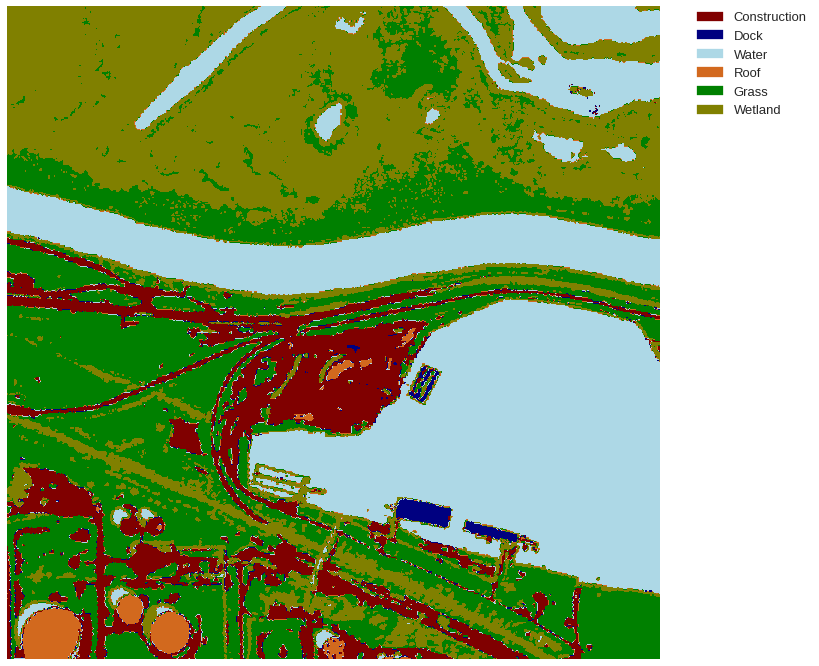

In [ ]:
from sklearn.svm import SVC

linear_svc=SVC(kernel='linear', C=1.0, probability=True) 
plot_class(linear_svc)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

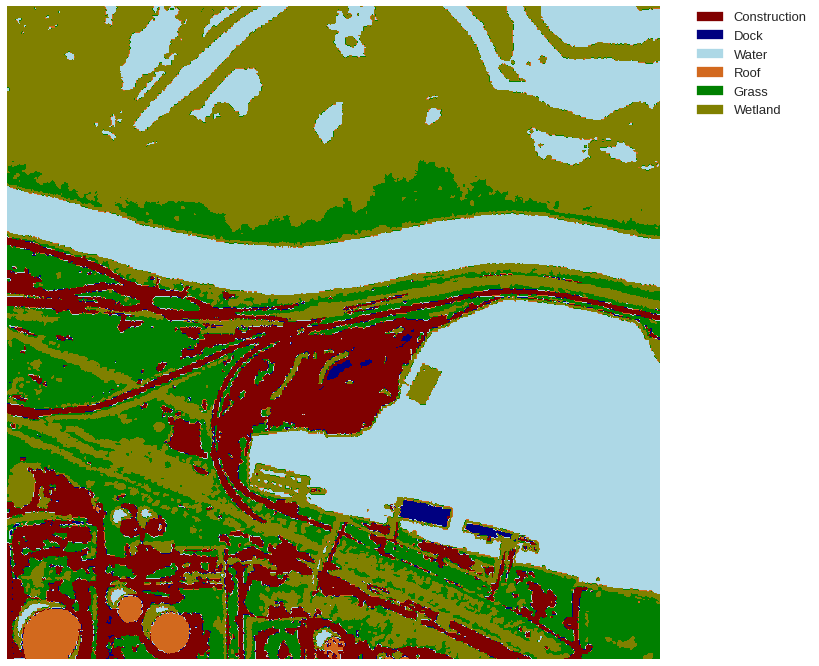

In [ ]:
poly_svc=SVC(kernel='poly', C=1.0, probability=True) 
plot_class(poly_svc)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

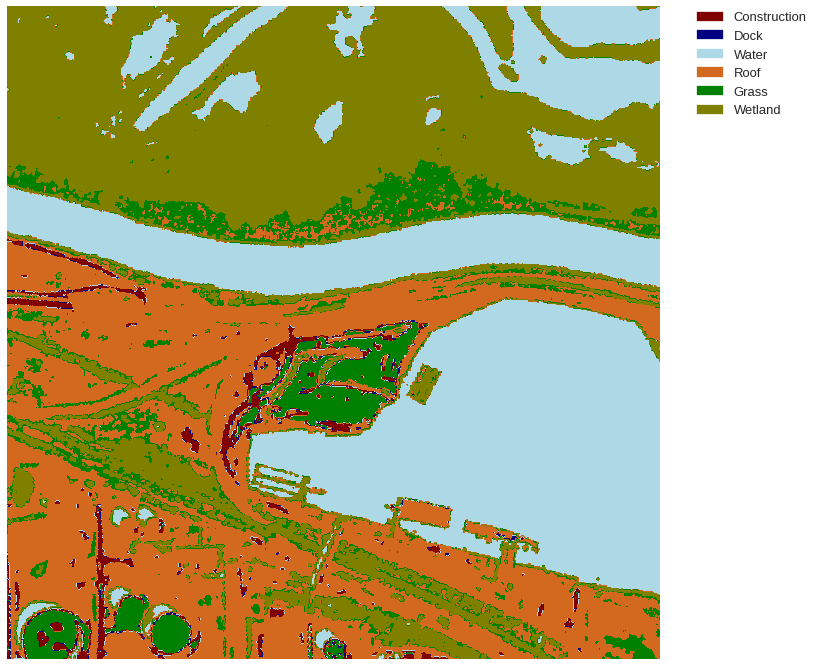

In [ ]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0, probability=True) 
plot_class(sigmoid_svc)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

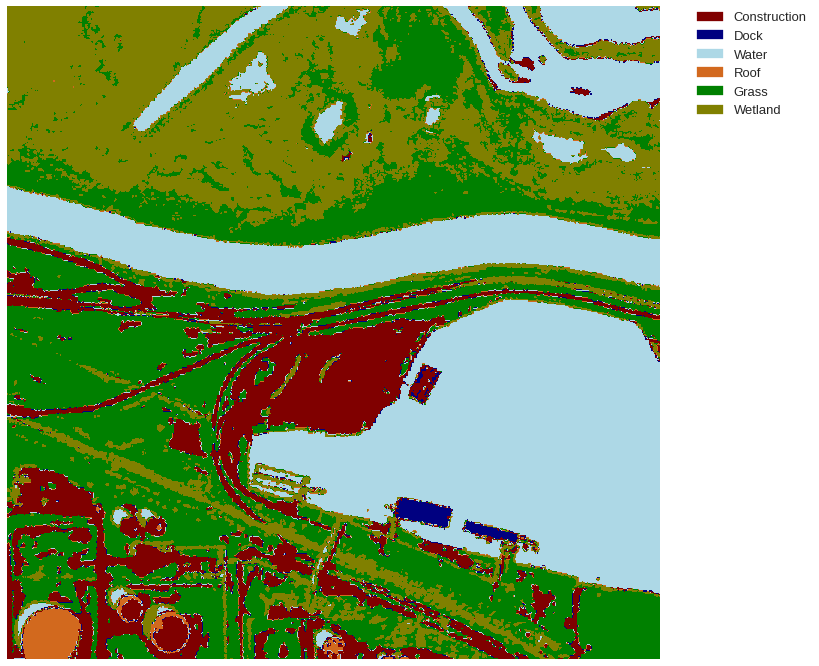

In [ ]:
rbf_svc=SVC(kernel='rbf', C=25.0) 
plot_class(rbf_svc)

In [ ]:
from sklearn.decomposition import PCA
img_norm=preprocessing.scale(df)
pca = PCA()
img_PCA = pca.fit_transform(img_norm)
pd.DataFrame(img_PCA)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,-4.511845,-1.075570,0.849254,-1.309317,-0.260372,0.372818,-0.203158,0.019846,-0.199221,-0.105855,0.038252,-0.079392,-0.032070,-0.005508,-0.000171,-0.018958,0.020251,-0.032213,0.016178,-0.006805,-0.043455,-0.013155,-0.017155,-0.021647,0.007260,-0.004861,-0.009275,-0.003947,0.000933,0.011718,0.011510,-0.016532,0.016459,-0.003430,0.003647,-0.013082,-0.012633,0.001069,0.009195,-0.000197,-0.000215,0.003850,0.011793,-0.000347,0.003526,0.008515,-0.011481,-0.000239,0.000443,-0.008723,-0.001208,0.003431,0.002112,0.000426,0.000088,0.001748,-0.002226,-0.005275,-0.003108,0.003223,0.004149,-0.003508,0.003169
1,-4.542166,-1.091974,0.875284,-1.293232,-0.270771,0.363279,-0.191042,0.011612,-0.210027,-0.100139,0.085395,-0.056096,-0.011939,0.007067,-0.067780,-0.000890,-0.007425,-0.035888,0.000939,0.002548,0.034821,-0.016385,-0.019933,-0.050988,0.011347,0.001207,-0.015795,0.001242,-0.000928,0.007129,0.010305,-0.026489,0.023285,-0.002200,0.016318,-0.005165,-0.010674,-0.010752,0.014388,0.002143,-0.005582,-0.002350,-0.000134,-0.004674,0.005197,0.004166,-0.008373,0.002059,0.004067,-0.002534,0.003439,0.004944,-0.002197,-0.001393,-0.004108,0.001917,0.000635,-0.001382,0.000026,0.006999,-0.000502,-0.002167,-0.000865
2,-4.045351,-1.289349,0.885384,-1.337873,-0.274683,0.261394,-0.164643,0.027940,-0.295329,-0.127289,0.071603,-0.117172,-0.037815,-0.014938,-0.039261,-0.036997,-0.003226,-0.036337,0.022131,0.016938,0.002167,-0.004477,-0.026321,-0.006093,0.024613,-0.032097,-0.013711,0.014105,0.010297,0.019074,0.006109,-0.014912,0.016941,0.010803,0.005930,0.005365,-0.001873,-0.002264,0.001130,-0.005495,-0.000821,0.010169,-0.002433,-0.001846,-0.003268,0.002279,-0.014524,-0.012563,-0.001703,0.004319,0.003960,-0.007409,0.012648,0.006794,0.003283,0.002476,-0.003747,0.003073,0.007433,-0.007702,0.007489,-0.000754,0.000747
3,-4.368299,-1.200719,0.888090,-1.324195,-0.265193,0.359645,-0.255818,0.006212,-0.269727,-0.107562,0.056222,-0.114597,-0.033190,-0.014859,-0.043666,-0.005448,0.021854,-0.044116,0.044506,-0.026686,0.000857,-0.002515,-0.026544,-0.052834,0.009573,0.003740,-0.016748,0.006249,0.000465,0.013132,0.010969,-0.017773,0.010804,0.014380,0.000327,-0.005332,-0.005450,-0.003310,-0.005346,0.007753,0.010498,0.002321,0.001337,-0.006515,-0.011681,-0.002877,-0.005030,-0.000434,-0.004229,-0.006931,-0.004703,0.000034,0.011776,-0.002905,0.002431,-0.002884,0.003189,-0.000077,0.002651,-0.000770,-0.001123,-0.004736,0.003757
4,-4.368299,-1.200719,0.888090,-1.324195,-0.265193,0.359645,-0.255818,0.006212,-0.269727,-0.107562,0.056222,-0.114597,-0.033190,-0.014859,-0.043666,-0.005448,0.021854,-0.044116,0.044506,-0.026686,0.000857,-0.002515,-0.026544,-0.052834,0.009573,0.003740,-0.016748,0.006249,0.000465,0.013132,0.010969,-0.017773,0.010804,0.014380,0.000327,-0.005332,-0.005450,-0.003310,-0.005346,0.007753,0.010498,0.002321,0.001337,-0.006515,-0.011681,-0.002877,-0.005030,-0.000434,-0.004229,-0.006931,-0.004703,0.000034,0.011776,-0.002905,0.002431,-0.002884,0.003189,-0.000077,0.002651,-0.000770,-0.001123,-0.004736,0.003757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295931,1.634263,-2.950409,-0.074684,-0.180837,0.840038,-0.142744,-0.081412,0.116090,-0.025125,0.029312,-0.277978,-0.091027,-0.031641,0.115924,0.042131,-0.073154,-0.028887,0.101481,-0.077178,-0.046820,-0.009303,0.030571,-0.019724,0.029961,0.016404,-0.028637,-0.008676,-0.018743,0.023940,0.011870,-0.009748,-0.007771,0.021533,0.004063,-0.015131,0.009124,0.009865,-0.004840,0.000498,0.005778,-0.003782,0.003950,0.002660,-0.001132,-0.000584,-0.008029,-0.016512,-0.000358,-0.001124,-0.011297,0.005309,-0.008839,0.000858,0.001766,0.006029,-0.010

In [ ]:
pd.DataFrame(pca.components_.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
0,-0.095115,-0.045955,0.251451,-0.328108,0.855755,-0.275822,0.044990,0.054155,0.059094,-0.018060,-0.001981,-0.006691,0.013534,-0.002627,-0.002743,-0.007331,0.010581,-0.012715,-0.009148,-0.000106,0.000412,0.005943,0.003482,-0.006793,-0.001648,-0.004475,-0.002384,0.000316,0.001531,0.000996,0.000405,-0.000440,0.000992,0.000366,-0.000431,0.000850,0.000794,-0.000879,0.000305,-0.000439,-0.000145,-0.000438,0.000187,0.000357,-0.000014,0.000037,0.000086,-0.000846,-0.000427,0.000182,-0.000237,0.000114,-0.000183,0.000467,0.000352,-0.000071,0.000055,-0.000245,0.000317,0.000115,-0.000087,-0.000012,0.000089
1,-0.071443,0.101779,0.255483,-0.833695,-0.447918,-0.139199,0.018371,0.052430,0.011782,-0.021781,0.003576,0.011680,0.009985,-0.000852,-0.000900,-0.003656,0.009479,-0.004589,-0.006605,0.001809,0.000575,-0.006083,-0.002494,0.000321,0.002171,-0.001107,0.002628,0.001257,0.001020,0.003926,-0.000548,-0.002484,-0.000445,0.000461,-0.000046,-0.000253,0.002053,-0.000346,0.000021,-0.000029,0.000397,0.000615,-0.000521,0.000200,0.000135,-0.000043,0.000110,-0.000659,0.000090,0.000890,-0.000025,-0.000494,-0.000529,-0.000666,-0.000290,0.000265,0.000492,-0.000003,-0.000042,-0.000022,0.000079,0.000037,0.000169
2,0.111063,0.156445,0.350189,0.158853,-0.042186,-0.006165,0.002963,0.246165,-0.032096,0.158111,0.063435,0.012000,0.007856,-0.069011,-0.060935,-0.012894,0.454222,0.012140,-0.162548,0.455110,0.054008,-0.083760,0.384367,-0.140062,0.042805,0.029067,0.118387,-0.236972,0.018431,-0.089990,-0.030546,-0.023199,0.020309,-0.044758,0.035393,-0.069545,-0.002141,0.029769,-0.013187,0.050547,0.006306,-0.005190,0.010301,0.020088,-0.013715,-0.008166,-0.007867,-0.005407,0.002182,-0.008037,-0.001822,0.009365,-0.017137,-0.017695,-0.003229,0.005063,0.005029,-0.000069,-0.003267,-0.004419,0.001148,-0.004736,-0.003457
3,0.113191,0.155636,0.329862,0.143568,-0.035998,-0.010380,0.000833,0.224430,-0.018795,0.137898,0.086234,-0.018298,0.068194,0.022039,-0.003431,-0.039184,0.022223,0.004965,-0.017049,0.056068,0.014216,0.049790,-0.220591,0.030244,-0.102351,-0.041039,-0.174206,0.754626,-0.136228,0.037031,-0.114634,0.147680,-0.015676,-0.149953,0.001129,-0.002198,0.005969,0.011893,0.011990,-0.021064,-0.007627,-0.004380,0.006400,0.007432,0.016579,0.010642,0.015916,-0.009588,0.016973,0.004671,-0.004649,-0.000761,0.008498,0.001417,-0.000772,0.003228,-0.000088,-0.002497,0.005199,0.002837,0.001150,0.004109,-0.002437
4,0.114906,0.154107,0.312593,0.131512,-0.031675,-0.014173,0.000842,0.198731,-0.027484,0.119487,0.078329,-0.040101,0.091946,0.049984,0.021322,-0.027769,-0.154793,0.006499,0.061425,-0.113379,-0.013365,0.075486,-0.242499,0.048742,-0.020360,-0.022004,-0.038329,-0.193344,0.053934,-0.073682,0.133742,-0.158349,-0.159612,0.688017,-0.217005,0.061082,-0.139448,0.047232,-0.001801,-0.010083,-0.008540,0.014874,-0.012425,-0.023616,0.017238,0.005355,0.003373,-0.001866,0.014482,0.016587,-0.000845,-0.000998,0.015849,0.001557,0.002915,-0.000548,-0.000175,-0.002766,0.004065,0.003370,-0.002551,0.007401,-0.002603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.125523,-0.147829,-0.022741,0.061711,-0.078831,-0.251593,0.234440,0.022890,0.340382,0.014736,0.066478,0.122183,0.000299,0.655462,-0.369059,0.324360,0.103864,-0.052531,0.028410,-0.045676,-0.031715,-0.062194,-0.014824,-0.057674,0.015407,-0.024156,0.004057,0.004191,0.008735,0.012356,0.006535,-0.015260,0.005719,0.002064,0.013440,0.005563,-0.004854,0.004388,-0.002547,0.001798,-0.000235,-0.002225,-0.002788,-0.002108,-0.002952,-0.002705,-0.001288,0.001195,-0.001434,0.002945,0.002382,-0.001384,-0.000264,0.001824,0.000667,-0.000858,0.002035,0.002112,-0.001445,-0.000

In [ ]:
pca.explained_variance_ratio_ 

array([8.79598116e-01, 7.27481335e-02, 2.33513919e-02, 1.10974649e-02,
       6.67481294e-03, 2.56352950e-03, 1.62350179e-03, 1.03957093e-03,
       3.15001299e-04, 2.51785518e-04, 1.35583425e-04, 1.11992230e-04,
       6.98379232e-05, 5.87296557e-05, 5.02589080e-05, 4.54627918e-05,
       3.58677464e-05, 3.07203850e-05, 2.88567507e-05, 2.67467617e-05,
       2.19919621e-05, 1.63915427e-05, 1.26757048e-05, 1.17049135e-05,
       9.08009974e-06, 8.12097795e-06, 5.42957172e-06, 4.92592880e-06,
       4.63461466e-06, 4.21609495e-06, 3.78408851e-06, 3.46947072e-06,
       2.72647607e-06, 2.58190383e-06, 2.33739743e-06, 2.24887824e-06,
       2.04702199e-06, 1.62080650e-06, 1.60327218e-06, 1.59353074e-06,
       1.46120783e-06, 1.39574993e-06, 1.30210751e-06, 1.20367258e-06,
       1.19742664e-06, 1.14417578e-06, 1.07620990e-06, 9.84365370e-07,
       9.19084692e-07, 8.89870570e-07, 8.29966780e-07, 8.17598725e-07,
       7.13535882e-07, 6.41210775e-07, 6.27369388e-07, 6.00715956e-07,
      

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.87959812, 0.95234625, 0.97569764, 0.98679511, 0.99346992,
       0.99603345, 0.99765695, 0.99869652, 0.99901152, 0.99926331,
       0.99939889, 0.99951088, 0.99958072, 0.99963945, 0.99968971,
       0.99973517, 0.99977104, 0.99980176, 0.99983062, 0.99985736,
       0.99987936, 0.99989575, 0.99990842, 0.99992013, 0.99992921,
       0.99993733, 0.99994276, 0.99994769, 0.99995232, 0.99995654,
       0.99996032, 0.99996379, 0.99996652, 0.9999691 , 0.99997144,
       0.99997368, 0.99997573, 0.99997735, 0.99997896, 0.99998055,
       0.99998201, 0.99998341, 0.99998471, 0.99998591, 0.99998711,
       0.99998825, 0.99998933, 0.99999031, 0.99999123, 0.99999212,
       0.99999295, 0.99999377, 0.99999448, 0.99999513, 0.99999575,
       0.99999635, 0.99999694, 0.99999752, 0.99999808, 0.9999986 ,
       0.9999991 , 0.99999957, 1.        ])

In [ ]:
pca = PCA(5)  # project from 63 to 5 dimensions
projected = pca.fit_transform(img_norm)
print(projected)
print(projected.shape)

[[-4.51184486 -1.07556961  0.84925414 -1.30931723 -0.26037172]
 [-4.54216563 -1.09197369  0.87528421 -1.29323184 -0.27077083]
 [-4.04535057 -1.28934945  0.88538409 -1.33787343 -0.27468314]
 ...
 [ 2.52621972 -3.67923474 -0.05607192 -0.30437879  0.80786562]
 [ 2.55557839 -3.72109947 -0.05334177 -0.3442219   0.83254565]
 [ 2.64019999 -3.7746752  -0.08456841 -0.33936615  0.81556365]]
(295936, 5)


In [ ]:
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

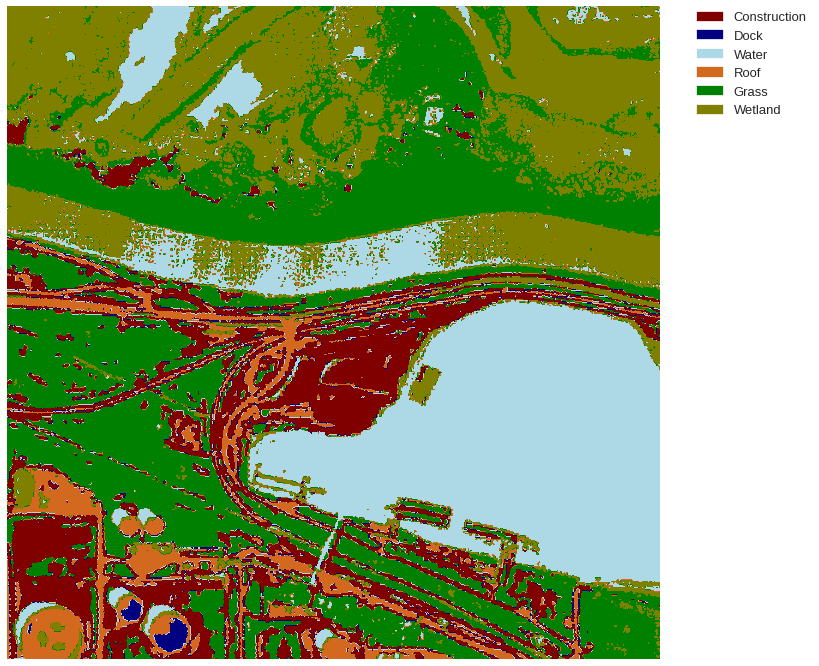

In [ ]:
def plot_projected(model):
    X_norm=preprocessing.scale(X) 
    X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=0)
    pca = PCA(5)  # project from 63 to 5 dimensions
    X_train = pca.fit_transform(X_train) 
    X_test = pca.transform(X_test)
    model.fit(X_train, y_train)

    class_pred = model.predict(projected)
    print(np.unique(class_pred))

    class_labels = ['Construction','Dock','Water','Roof','Grass','Wetland']
    classfication = class_pred.reshape(img[:, :, 0].shape)
    # Create a colormap from a list of colors
    colors = ['maroon','navy', 'lightblue', 'chocolate', 'green','olive']
    cmap = ListedColormap(colors)
    plt.figure(figsize=(12,12))
    f, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(classfication,
                  cmap=cmap)
    ep.draw_legend(im, titles=class_labels)
    ax.set_axis_off()
    plt.show()
    return 
model = LogisticRegression(max_iter=500)
plot_projected(model)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

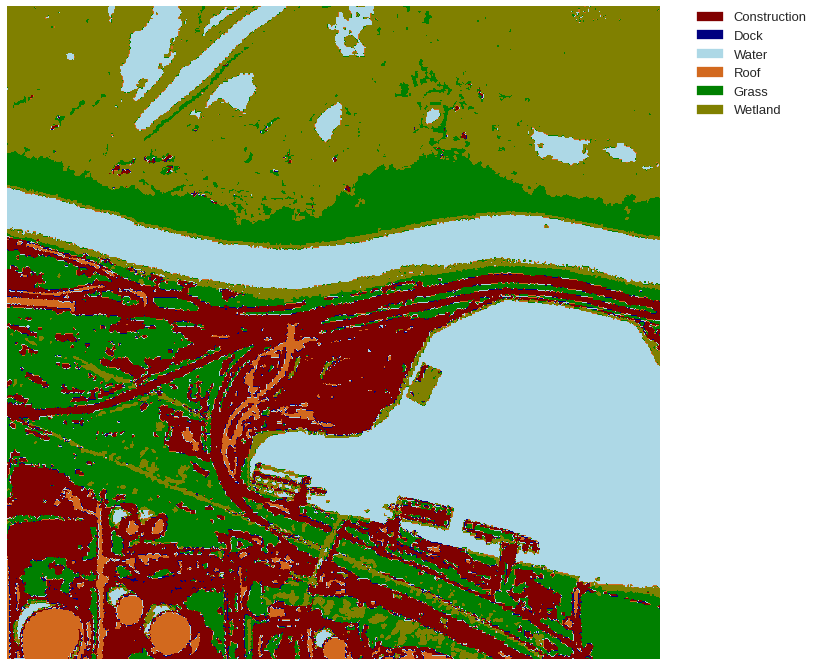

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
plot_projected(knn)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

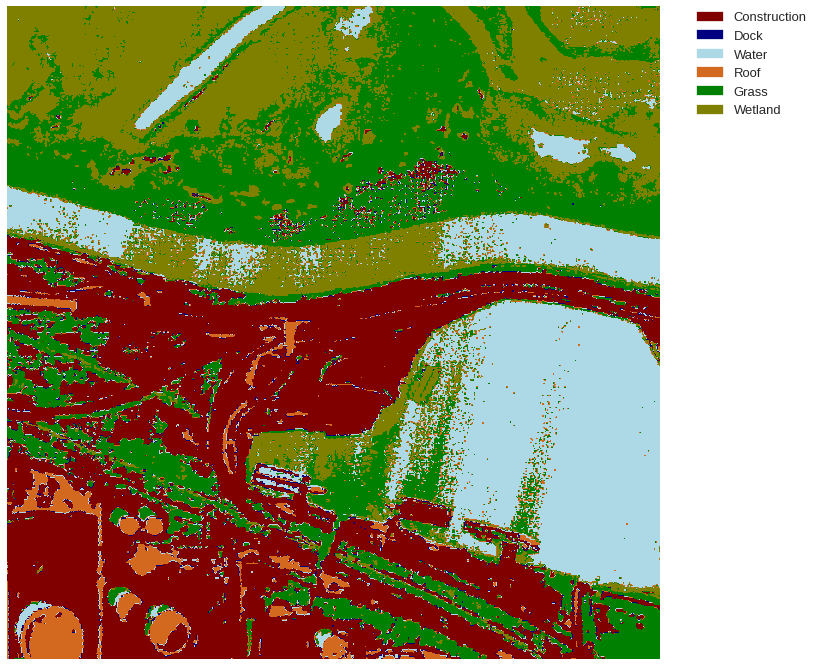

In [ ]:
model = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=30, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
plot_projected(model)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

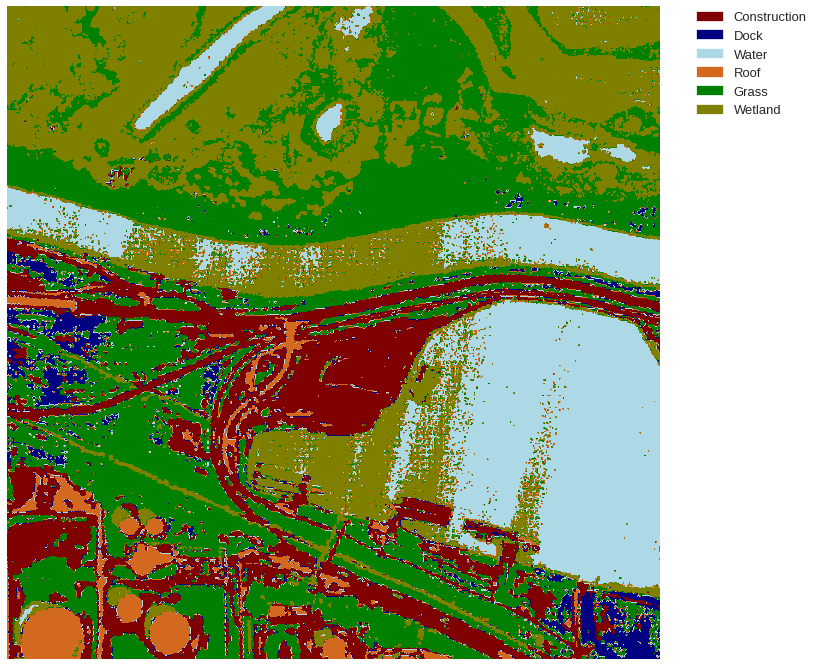

In [ ]:
model = RandomForestClassifier (n_estimators=100, n_jobs=-1, 
                                      max_features='auto', 
                                      max_depth= 18, min_samples_leaf=3,
                                      random_state=42)
plot_projected(model)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

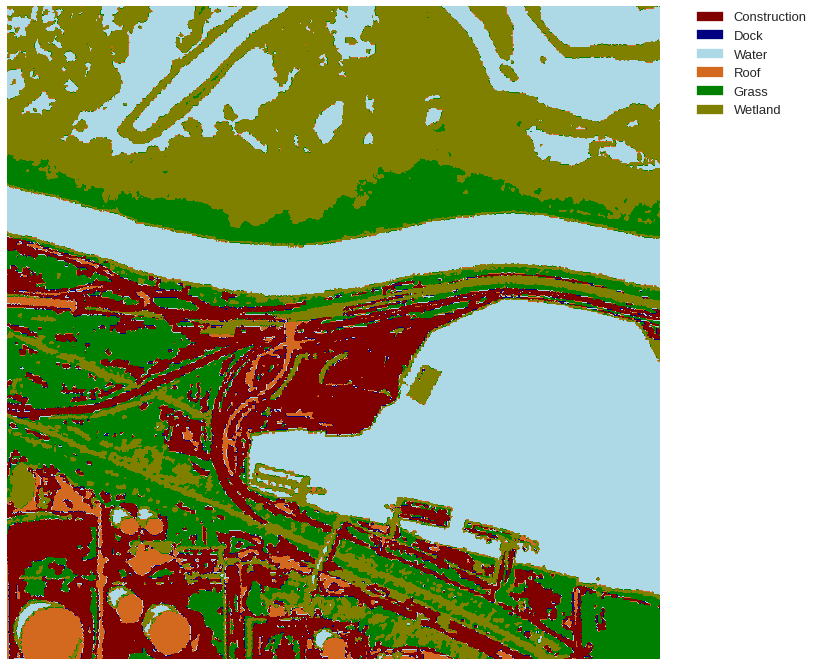

In [ ]:
model = GaussianNB(var_smoothing=1e-02)
plot_projected(model)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

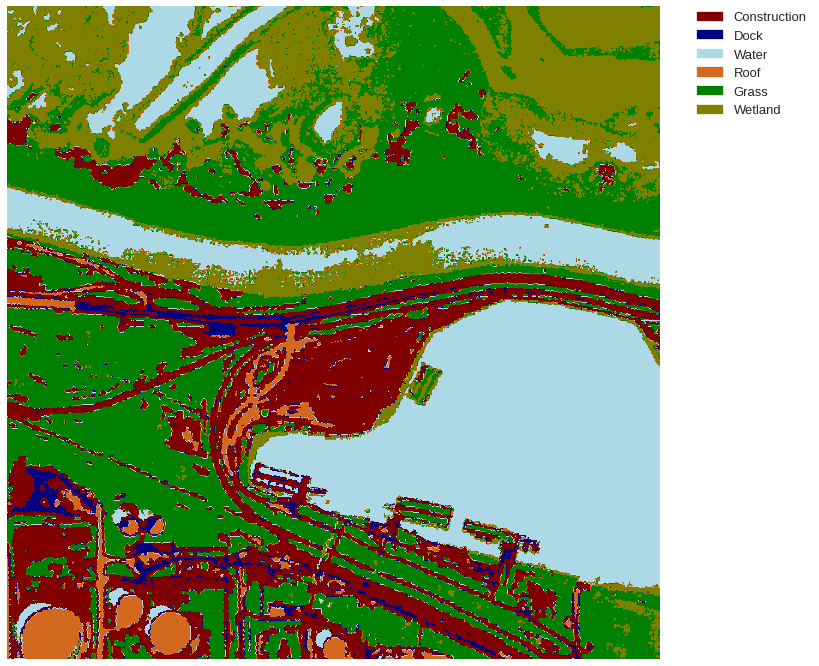

In [ ]:
linear_svc=SVC(kernel='linear', C=1.0, probability=True) 
plot_projected(linear_svc)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

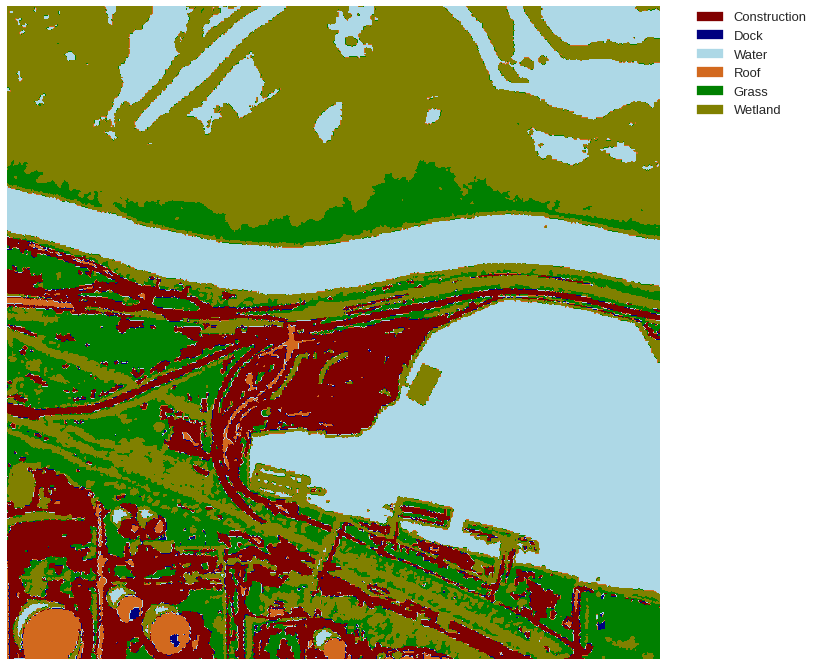

In [ ]:
poly_svc=SVC(kernel='poly', C=1.0, probability=True) 
plot_projected(poly_svc)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

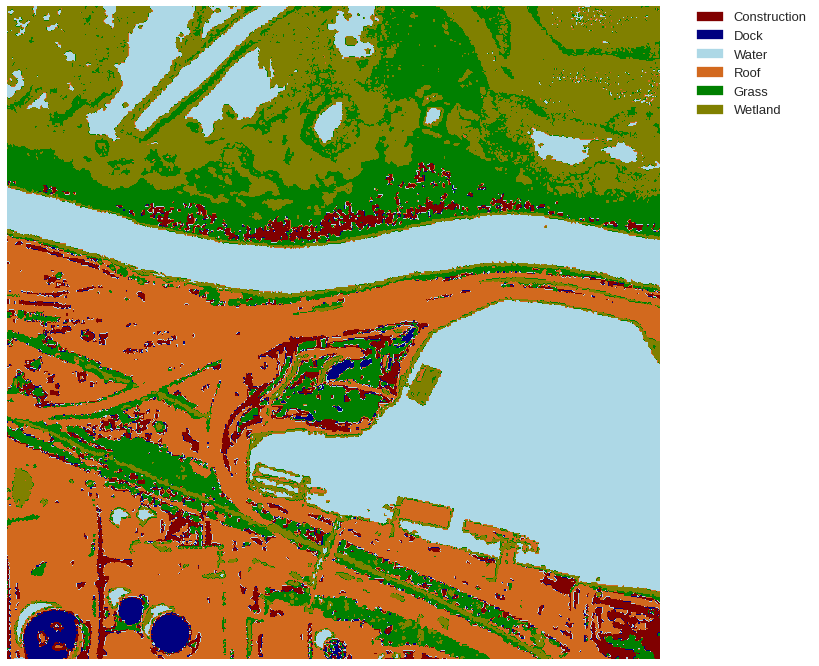

In [ ]:
sigmoid_svc=SVC(kernel='sigmoid', C=10.0, probability=True) 
plot_projected(sigmoid_svc)

[1 2 3 4 5 6]


<Figure size 864x864 with 0 Axes>

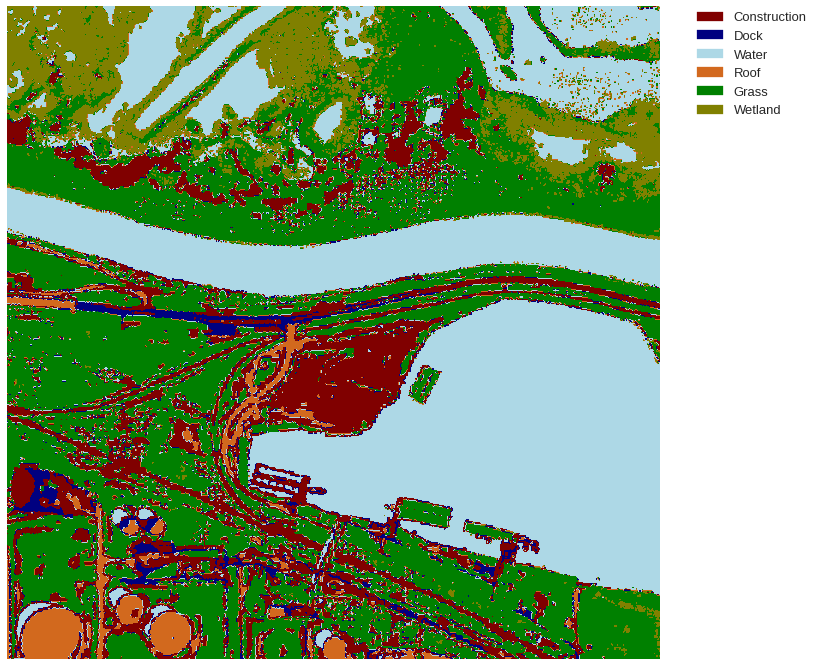

In [ ]:
rbf_svc=SVC(kernel='rbf', C=25.0) 
plot_projected(rbf_svc)